In [1]:
# step 1 download the web page with eng news
import requests

r=requests.get("http://news.yahoo.com")

In [2]:
r.text[:100]

'<!doctype html><html data-color-scheme id=atomic class="ltr news  desktop  fp-none bkt900,seamless u'

In [3]:
# STEP 2

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
import re
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True
page_text_list = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list.append(t)
page_text = "".join(page_text_list)
page_text[:80]
page_words = page_text.split()
print(len(page_words), page_words[:10])
import string
page_words2 = [w.strip(string.punctuation).lower() for w in page_words if
len(w.strip(string.punctuation))>0]
print(len(page_words2), page_words2[:10])

3287 ['News', "Today's", 'news', 'US', 'Politics', 'World', 'Tech', 'COVID-19', 'Climate', 'change']
3284 ['news', "today's", 'news', 'us', 'politics', 'world', 'tech', 'covid-19', 'climate', 'change']


In [4]:
# STEP 3
from collections import Counter
page_word_freq = Counter(page_words2).most_common()
print(len(page_word_freq), page_word_freq[:10])

1526 [('the', 113), ('for', 81), ('a', 69), ('of', 65), ('and', 64), ('to', 62), ('your', 54), ('feedback', 51), ('read', 51), ('min', 50)]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

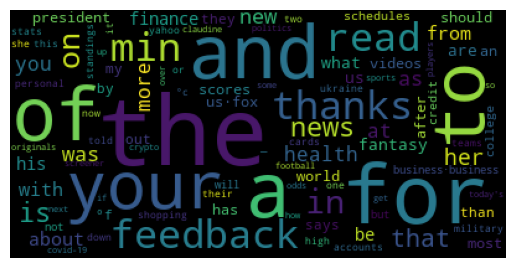

In [5]:
# STEP 4
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

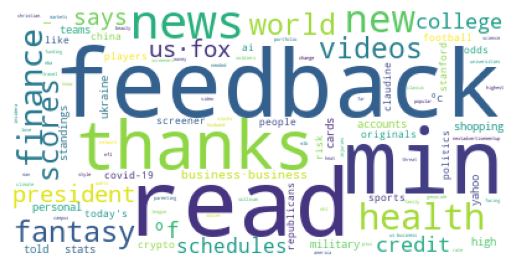

In [7]:

# STEP 5

ENGLISH_STOP_WORDS = ["a", "about", "above", "across", "after", "afterwards",
"again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"]
##Check the effect of removing stopwords
word_freq_no_stop = [w for w in page_word_freq if w[0] not in ENGLISH_STOP_WORDS and not w[0].isdigit()]
dict_word_freq_no_stop = {}
for i in word_freq_no_stop:
    dict_word_freq_no_stop[i[0]]=i[1]
plt.imshow(wordcloud)
plt.axis("off")
wordcloud = WordCloud(background_color='white',max_words=100).fit_words(dict_word_freq_no_stop)
# Display the generated image, the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

In [8]:
# step 1 download the web page with eng news
import requests

r=requests.get("https://tvn24.pl/")

In [9]:
r.text[:100]


'<!DOCTYPE html><html lang="pl"><head><script type="text/javascript">\n    window.__AB_TESTS__ = {\n   '

In [10]:
# STEP 2

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')
import re
def visible(element):
    if element.parent.name in ['style', 'script', '[document]', 'head', 'title']:
        return False
    elif re.match('<!--.*-->', str(element.encode('utf-8'))):
        return False
    return True
page_text_list = []
for t in filter(visible, soup.findAll(text=True)):
    page_text_list.append(t)
page_text = "".join(page_text_list)
page_text[:80]
page_words = page_text.split()
print(len(page_words), page_words[:10])
import string
page_words2 = [w.strip(string.punctuation).lower() for w in page_words if
len(w.strip(string.punctuation))>0]
print(len(page_words2), page_words2[:10])

1520 ['TVN24NajnowszeFaktyWybory', '2023TVN24', 'GOPolskaŚwiatMiasta:', 'WarszawaWarszawaŁódźKatowiceKrakówTrójmiastoPoznańWrocławKielceKujawsko-PomorskieLublinLubuskieOlsztynOpoleRzeszówSzczecinBiałystokPremiumMeteoBiznesSportKonkret24Kontakt24ToTerazOpinieAtak', 'Rosji', 'na', 'UkrainęKultura', 'i', 'stylSzkło', 'KontaktoweCiekawostkiProgramyRaportyTVN24']
1488 ['tvn24najnowszefaktywybory', '2023tvn24', 'gopolskaświatmiasta', 'warszawawarszawałódźkatowicekrakówtrójmiastopoznańwrocławkielcekujawsko-pomorskielublinlubuskieolsztynopolerzeszówszczecinbiałystokpremiummeteobiznessportkonkret24kontakt24toterazopinieatak', 'rosji', 'na', 'ukrainękultura', 'i', 'stylszkło', 'kontaktoweciekawostkiprogramyraportytvn24']


In [11]:
# STEP 3
from collections import Counter
page_word_freq = Counter(page_words2).most_common()
print(len(page_word_freq), page_word_freq[:10])

990 [('w', 73), ('na', 28), ('i', 27), ('z', 26), ('o', 15), ('jest', 14), ('się', 13), ('do', 12), ('nie', 11), ('grudnia', 10)]


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

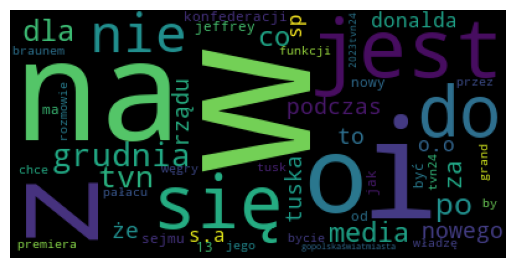

In [12]:
# STEP 4
%pylab inline
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud
dict_page_word_freq = {}
for i in page_word_freq:
    dict_page_word_freq[i[0]]=i[1]
wordcloud = WordCloud(max_words=100).fit_words(dict_page_word_freq)
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

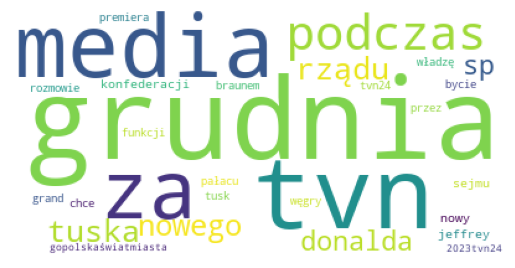

In [21]:
# STEP 5

POLISH_STOP_WORDS = ["ach", "aj", "albo", "bardzo", "bez", "bo", "być", "ci", "cię", "ciebie",
"co", "czy", "daleko", "dla", "dlaczego", "dlatego", "do", "dobrze",
"dokąd", "dość", "dużo", "dwa", "dwaj", "dwie", "dwoje", "dziś", "dzisiaj", 
"gdyby", "gdzie", "go", "ich", "ile", "im", "inny", "ja", "ją", "jak", "jakby", 
"jaki", "je", "jeden", "jedna", "jedno", "jego", "jej", "jemu", "jeśli", "jest",
"jestem", "jeżeli", "już", "każdy", "kiedy", "kierunku", "kto", "ku", "lub", "ma", "mają",
"mam", "mi", "mną", "mnie", "moi", "mój", "moja", "moje", "może", "mu", "my", "na", "nam", 
"nami", "nas", "nasi", "nasz", "nasza", "nasze", "natychmiast", "nią", "nic", "nich", "nie",
"niego", "niej", "niemu", "nigdy", "nim", "nimi", "niż", "obok", "od", "około", "on", "ona", 
"one", "oni", "ono", "owszem", "po", "pod", "ponieważ", "przed", "przedtem", "są", "sam", 
"sama", "się", "skąd", "tak", "taki", "tam", "ten", "to", "tobą", "tobie", "tu", "tutaj", 
"twoi", "twój", "twoja", "twoje", "ty", "wam", "wami", "was", "wasi", "wasz", "wasza", "wasze",
"we", "więc", "wszystko", "wtedy", "wy", "żaden", "zawsze", "że","nie", "na","w","i", "z","o","s.a",
                    "o.o","by"]
##Check the effect of removing stopwords
word_freq_no_stop = [w for w in page_word_freq if w[0] not in POLISH_STOP_WORDS and not w[0].isdigit()]
dict_word_freq_no_stop = {}
for i in word_freq_no_stop:
    dict_word_freq_no_stop[i[0]]=i[1]
plt.imshow(wordcloud)
plt.axis("off")
wordcloud = WordCloud(background_color='white',max_words=100).fit_words(dict_word_freq_no_stop)
# Display the generated image, the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")